# 브랜드 커피 상권 분석

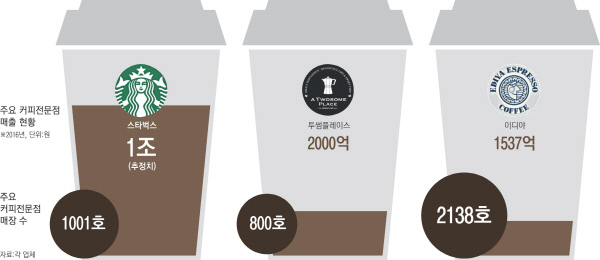

In [1]:
from IPython.display import Image
Image("../picture/61355ecba9bc43cebbf3c158c805513e.jpg")

# 사용 모듈

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

# 데이터(https://www.data.go.kr/data/15083033/fileData.do)

In [3]:
temp = pd.read_csv("C:\python\public_data_pratice\소상공인시장진흥공단_상가(상권)정보_20220630\소상공인시장진흥공단_상가(상권)정보_서울_202206.csv")
temp.head(2)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23324279,제중건강원,NaN,D,소매,D10,건강/미용식품,D10A07,건강원,G47216,...,1156010600100410002034626,NaN,서울특별시 영등포구 영중로14길 11-17,150035,7250.0,NaN,1,NaN,126.907168,37.520613
1,24525909,민속악기사,NaN,D,소매,D04,취미/오락관련소매,D04A09,악기판매,G47593,...,1120012200101420011000227,NaN,서울특별시 성동구 용답5길 2,133849,4803.0,NaN,NaN,NaN,127.049018,37.566857


In [4]:
temp.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

# 지역별로 나누어진 데이터 조인

In [5]:
from glob import glob

file_names = glob("C:\python\public_data_pratice\소상공인시장진흥공단_상가(상권)정보_20220630\*.csv")

total = pd.DataFrame()

for file_name in file_names:
    temp = pd.read_csv(file_name)
    total = pd.concat([total,temp])

total.reset_index(inplace=True, drop=True)
total

C:\Users\pjh23\AppData\Local\Temp\ipykernel_43112\1987349692.py:8: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name)
C:\Users\pjh23\AppData\Local\Temp\ipykernel_43112\1987349692.py:8: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name)
C:\Users\pjh23\AppData\Local\Temp\ipykernel_43112\1987349692.py:8: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name)
C:\Users\pjh23\AppData\Local\Temp\ipykernel_43112\1987349692.py:8: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name)
C:\Users\pjh23\AppData\Local\Temp\ipykernel_43112\1987349692.py:8: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,25033300,동그라미중고타이어,NaN,D,소매,D23,자동차/자동차용품,D23A04,타이어판매,G45211,...,4215011100110960006010791,NaN,강원도 강릉시 가작로 270,210110.0,25488.0,1,NaN,NaN,128.904472,37.770252
1,17174549,세인트존스호텔Ohcrab,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,...,4215011300100010001017124,세인트존스호텔,강원도 강릉시 창해로 307,210120.0,25467.0,NaN,NaN,NaN,128.920908,37.791299
2,17174079,평창라마다호텔,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,...,4276038024102450036000001,NaN,강원도 평창군 대관령면 오목길 107,232954.0,25342.0,NaN,NaN,NaN,128.717971,37.660051
3,17173904,호텔탑스텐스카이라운지,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,...,4215035029100920001000002,NaN,강원도 강릉시 옥계면 헌화로 455-34,210831.0,25633.0,NaN,NaN,NaN,129.052902,37.654680
4,24412526,레이디가구,NaN,D,소매,D15,가구소매,D15A01,일반가구소매,G47520,...,4213011500111400020035715,NaN,강원도 원주시 송삼길 156-19,220150.0,26385.0,NaN,NaN,NaN,127.917307,37.327668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363989,18464876,광수가코다리,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,4371025346004280007001720,NaN,충청북도 청주시 청원구 오창읍 과학산업2로 271,363884.0,28121.0,NaN,1,NaN,127.414962,36.709197
2363990,18469519,파티라운지운천,NaN,D,소매,D02,선물/팬시/기념품,D02A02,꽃집/꽃배달,G47851,...,4311310400109520000015777,NaN,충청북도 청주시 흥덕구 사운로187번길 64-2,361841.0,28471.0,NaN,NaN,NaN,127.474862,36.644013
2363991,18444490,도배,NaN,F,생활서비스,F15,주택수리,F15A02,미장타일도배도장,NaN,...,4311310200102310017003360,세종회관,충청북도 청주시 서원구 사직대로 133-1,362832.0,28567.0,NaN,NaN,NaN,127.462285,36.635306
2363992,18446727,황금물류,NaN,F,생활서비스,F08,대행업,F08A03,고객관리대행,N75919,...,4311112000101990001048789,금천현대아파트,충청북도 청주시 상당구 중고개로337번길 23,360766.0,28727.0,113,NaN,NaN,127.504480,36.629324


In [6]:
data = total[['상호명',"지점명","상권업종대분류명","상권업종중분류명","시도명","시군구명","행정동명"]]
data

,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,동그라미중고타이어,NaN,소매,자동차/자동차용품,강원도,강릉시,포남1동
1,세인트존스호텔Ohcrab,NaN,숙박,호텔/콘도,강원도,강릉시,초당동
2,평창라마다호텔,NaN,숙박,호텔/콘도,강원도,평창군,대관령면
3,호텔탑스텐스카이라운지,NaN,숙박,호텔/콘도,강원도,강릉시,옥계면
4,레이디가구,NaN,소매,가구소매,강원도,원주시,무실동
...,...,...,...,...,...,...,...
2363989,광수가코다리,NaN,음식,한식,충청북도,청주시 청원구,오창읍
2363990,파티라운지운천,NaN,소매,선물/팬시/기념품,충청북도,청주시 흥덕구,운천.신봉동
2363991,도배,NaN,생활서비스,주택수리,충청북도,청주시 서원구,사창동
2363992,황금물류,NaN,생활서비스,대행업,충청북도,청주시 상당구,금천동


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363994 entries, 0 to 2363993
Data columns (total 7 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   상호명       object
 1   지점명       object
 2   상권업종대분류명  object
 3   상권업종중분류명  object
 4   시도명       object
 5   시군구명      object
 6   행정동명      object
dtypes: object(7)
memory usage: 126.3+ MB


In [8]:
data.describe()

,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
count,2363993,362853,2363994,2363994,2363994,2363994,2363994
unique,1381018,119459,8,89,17,236,3168
top,CU,본점,음식,한식,경기도,서구,중앙동
freq,11124,2767,797182,298081,546552,68832,42437


In [9]:
plt.rc('font',family='Malgun Gothic')

In [10]:
set(data["상권업종중분류명"])

{'PC/오락/당구/볼링등',
 '가구소매',
 '가방/신발/액세서리',
 '가전제품소매',
 '가정/주방/인테리어',
 '개인/가정용품수리',
 '개인서비스',
 '건강/미용식품',
 '경마/경륜/성인오락',
 '광고/인쇄',
 '기타서비스업',
 '기타음식업',
 '기타판매업',
 '놀이/여가/취미',
 '닭/오리요리',
 '대중목욕탕/휴게',
 '대행업',
 '도서관/독서실',
 '모텔/여관/여인숙',
 '무도/유흥/가무',
 '물품기기대여',
 '민박/하숙',
 '법무세무회계',
 '별식/퓨전요리',
 '부동산관련서비스',
 '부동산중개',
 '부페',
 '분식',
 '분양',
 '사무/문구/컴퓨터',
 '사진',
 '사진/광학/정밀기기소매',
 '선물/팬시/기념품',
 '세탁/가사서비스',
 '스포츠/운동',
 '시계/귀금속소매',
 '실내운동시설',
 '실외운동시설',
 '애견/애완/동물',
 '양식',
 '연극/영화/극장',
 '예술품/골동품/수석/분재',
 '예식/의례/관혼상제',
 '요가/단전/마사지',
 '운동/경기용품소매',
 '운송/배달/택배',
 '운영관리시설',
 '유스호스텔',
 '유아교육',
 '유아용품',
 '유흥주점',
 '음/식료품소매',
 '음식배달서비스',
 '의복의류',
 '의약/의료품소매',
 '이/미용/건강',
 '인력/고용/용역알선',
 '일식/수산물',
 '자동차/이륜차',
 '자동차/자동차용품',
 '장례/묘지',
 '제과제빵떡케익',
 '종교용품판매',
 '종합소매점',
 '주유소/충전소',
 '주택수리',
 '중고품소매/교환',
 '중식',
 '책/서적/도서',
 '철물/난방/건설자재소매',
 '취미/오락관련소매',
 '캠프/별장/펜션',
 '커피점/카페',
 '패스트푸드',
 '페인트/유리제품소매',
 '평가/개발/관리',
 '학문교육기타',
 '학원-보습교습입시',
 '학원-어학',
 '학원-예능취미체육',
 '학원-음악미술무용',
 '학원-자격/국가고시',
 '학원-창업취업취미',
 '학원-컴퓨터',
 

In [11]:
df_coffee = data[data['상권업종중분류명']=='커피점/카페']
print("전국 커피 전문점 점포수 : ", len(df_coffee))
df_coffee.head()

전국 커피 전문점 점포수 :  110455


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
13,키즈까페아이사랑,NaN,음식,커피점/카페,강원도,강릉시,성덕동
39,힐링,NaN,음식,커피점/카페,강원도,원주시,단구동
56,드롭탑,속초엑스포점,음식,커피점/카페,강원도,속초시,조양동
83,상유재카페,NaN,음식,커피점/카페,강원도,정선군,정선읍
270,수정다방,NaN,음식,커피점/카페,강원도,고성군,거진읍


In [12]:
set(data['시도명'])

{'강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '인천광역시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도'}

In [13]:
df_coffee_seoul = df_coffee[df_coffee['시도명']=='서울특별시']
df_coffee_seoul.index = range(len(df_coffee_seoul))
df_coffee_seoul.head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,커피빈,코리아대학로대명거리점,음식,커피점/카페,서울특별시,종로구,혜화동
1,요거프레소,쌍문점,음식,커피점/카페,서울특별시,도봉구,쌍문2동
2,우성커피숍,NaN,음식,커피점/카페,서울특별시,양천구,신월4동
3,버블베어,NaN,음식,커피점/카페,서울특별시,강서구,방화3동
4,알뤼르,NaN,음식,커피점/카페,서울특별시,강남구,대치4동


In [14]:
a=list(set(data["시도명"]))
import sys
mod = sys.modules[__name__]
for i in range(len(a)):
    setattr(mod, 'df_coffee_{}'.format(a[i]), df_coffee[df_coffee['시도명']==a[i]])

df_coffee_강원도.index = range(len(df_coffee_강원도))
df_coffee_경기도.index = range(len(df_coffee_경기도))
df_coffee_경상남도.index = range(len(df_coffee_경상남도))
df_coffee_경상북도.index = range(len(df_coffee_경상북도))
df_coffee_광주광역시.index = range(len(df_coffee_광주광역시))
df_coffee_대구광역시.index = range(len(df_coffee_대구광역시))
df_coffee_대전광역시.index = range(len(df_coffee_대전광역시))
df_coffee_부산광역시.index = range(len(df_coffee_부산광역시))
df_coffee_서울특별시.index = range(len(df_coffee_서울특별시))
df_coffee_세종특별자치시.index = range(len(df_coffee_세종특별자치시))
df_coffee_울산광역시.index = range(len(df_coffee_울산광역시))
df_coffee_인천광역시.index = range(len(df_coffee_인천광역시))
df_coffee_전라남도.index = range(len(df_coffee_전라남도))
df_coffee_전라북도.index = range(len(df_coffee_전라북도))
df_coffee_제주특별자치도.index = range(len(df_coffee_제주특별자치도))
df_coffee_충청남도.index = range(len(df_coffee_충청남도))
df_coffee_충청북도.index = range(len(df_coffee_충청북도))

df_coffee_대구광역시


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,커피명가,2호점,음식,커피점/카페,대구광역시,중구,삼덕동
1,스타벅스,대구중앙로점,음식,커피점/카페,대구광역시,중구,성내2동
2,카페나니아,NaN,음식,커피점/카페,대구광역시,북구,복현1동
3,대림다방,NaN,음식,커피점/카페,대구광역시,수성구,수성2.3가동
4,샌디버블,NaN,음식,커피점/카페,대구광역시,남구,대명2동
...,...,...,...,...,...,...,...
5087,감영당,NaN,음식,커피점/카페,대구광역시,중구,성내2동
5088,유캔두잇,NaN,음식,커피점/카페,대구광역시,북구,국우동
5089,위치리스트,NaN,음식,커피점/카페,대구광역시,동구,신암5동
5090,크로플덕오리아가씨,NaN,음식,커피점/카페,대구광역시,달서구,송현1동


In [15]:
df_starbucks = df_coffee[df_coffee['상호명'].str.contains('스타벅스')]
df_starbucks.index = range(len(df_starbucks))
print('전국 스타벅스 점포 수 : ', len(df_starbucks))
df_starbucks.head()

전국 스타벅스 점포 수 :  1505


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,스타벅스강릉안목항점,강릉안목항점,음식,커피점/카페,강원도,강릉시,송정동
1,스타벅스춘천후평DT점,춘천후평DT점,음식,커피점/카페,강원도,춘천시,후평3동
2,스타벅스,춘천명동점,음식,커피점/카페,강원도,춘천시,약사명동
3,스타벅스설악워터피아점,설악워터피아점,음식,커피점/카페,강원도,속초시,영랑동
4,스타벅스,원주터미널점,음식,커피점/카페,강원도,원주시,무실동


In [16]:
plt.rcParams['font.family'] = 'Malgun Gothic'

([<matplotlib.axis.XTick at 0x1b15a34d040>,
 [Text(0, 0, '경기도'),
  Text(1, 0, '충청북도'),
  Text(2, 0, '대전광역시'),
  Text(3, 0, '대구광역시'),
  Text(4, 0, '전라북도'),
  Text(5, 0, '경상남도'),
  Text(6, 0, '강원도'),
  Text(7, 0, '인천광역시'),
  Text(8, 0, '세종특별자치시'),
  Text(9, 0, '경상북도'),
  Text(10, 0, '부산광역시'),
  Text(11, 0, '전라남도'),
  Text(12, 0, '충청남도'),
  Text(13, 0, '제주특별자치도'),
  Text(14, 0, '울산광역시'),
  Text(15, 0, '서울특별시'),
  Text(16, 0, '광주광역시')])

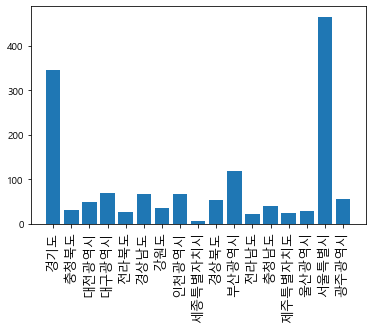

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

a = list(set(data['시도명']))
v1 = [len(df_starbucks[df_starbucks['시도명']==a[i]]) for i in range(len(a))]
index = np.arange(len(a))
plt.bar(a, v1)
plt.xticks(index, a, fontsize=13, rotation=90)

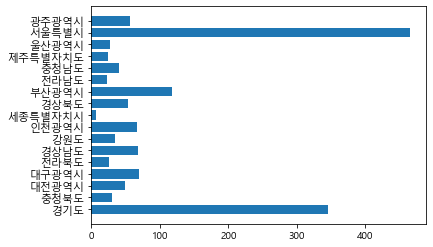

In [18]:
plt.barh(index,v1)
plt.yticks(index, a, fontsize=11, rotation=0)
plt.show()

In [19]:
sum_star = sum(v1)
for i in range(len(a)):
    print('스타벅스의 전국 대비 {}에서의 비율 : {: .3f}%' .format(a[i],v1[i]/sum_star*100))

스타벅스의 전국 대비 경기도에서의 비율 :  22.924%
스타벅스의 전국 대비 충청북도에서의 비율 :  1.993%
스타벅스의 전국 대비 대전광역시에서의 비율 :  3.256%
스타벅스의 전국 대비 대구광역시에서의 비율 :  4.585%
스타벅스의 전국 대비 전라북도에서의 비율 :  1.728%
스타벅스의 전국 대비 경상남도에서의 비율 :  4.518%
스타벅스의 전국 대비 강원도에서의 비율 :  2.326%
스타벅스의 전국 대비 인천광역시에서의 비율 :  4.452%
스타벅스의 전국 대비 세종특별자치시에서의 비율 :  0.465%
스타벅스의 전국 대비 경상북도에서의 비율 :  3.588%
스타벅스의 전국 대비 부산광역시에서의 비율 :  7.841%
스타벅스의 전국 대비 전라남도에서의 비율 :  1.528%
스타벅스의 전국 대비 충청남도에서의 비율 :  2.658%
스타벅스의 전국 대비 제주특별자치도에서의 비율 :  1.661%
스타벅스의 전국 대비 울산광역시에서의 비율 :  1.860%
스타벅스의 전국 대비 서울특별시에서의 비율 :  30.897%
스타벅스의 전국 대비 광주광역시에서의 비율 :  3.721%


In [20]:
df_two = df_coffee[df_coffee['상호명'].str.contains("투썸")]
df_two.index = range(len(df_two))
print('전국 투썸 점포 수 : ', len(df_two))
df_two.head()

전국 투썸 점포 수 :  1105


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,투썸플레이스,춘천명동점,음식,커피점/카페,강원도,춘천시,조운동
1,투썸플레이스,소양강댐점,음식,커피점/카페,강원도,춘천시,신북읍
2,투썸플레이스,용평리조트점,음식,커피점/카페,강원도,평창군,대관령면
3,투썸플레이스,철원와수점,음식,커피점/카페,강원도,철원군,서면
4,투썸플레이스동해중앙점,동해중앙점,음식,커피점/카페,강원도,동해시,천곡동


In [21]:
a = list(set(data['시도명']))
a

['경기도',
 '충청북도',
 '대전광역시',
 '대구광역시',
 '전라북도',
 '경상남도',
 '강원도',
 '인천광역시',
 '세종특별자치시',
 '경상북도',
 '부산광역시',
 '전라남도',
 '충청남도',
 '제주특별자치도',
 '울산광역시',
 '서울특별시',
 '광주광역시']

([<matplotlib.axis.XTick at 0x1b160c92850>,
 [Text(0, 0, '경기도'),
  Text(1, 0, '충청북도'),
  Text(2, 0, '대전광역시'),
  Text(3, 0, '대구광역시'),
  Text(4, 0, '전라북도'),
  Text(5, 0, '경상남도'),
  Text(6, 0, '강원도'),
  Text(7, 0, '인천광역시'),
  Text(8, 0, '세종특별자치시'),
  Text(9, 0, '경상북도'),
  Text(10, 0, '부산광역시'),
  Text(11, 0, '전라남도'),
  Text(12, 0, '충청남도'),
  Text(13, 0, '제주특별자치도'),
  Text(14, 0, '울산광역시'),
  Text(15, 0, '서울특별시'),
  Text(16, 0, '광주광역시')])

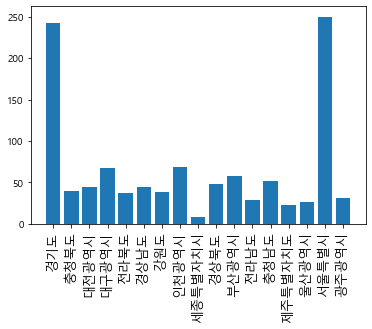

In [22]:
v2 = [len(df_two[df_two['시도명']==a[i]]) for i in range(len(a))]
index = np.arange(len(a))
plt.bar(a,v2)
plt.xticks(index,a,fontsize=13,rotation=90)

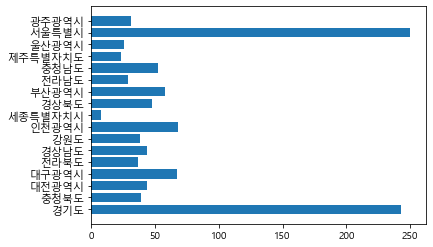

In [23]:
plt.barh(index, v2)
plt.yticks(index,a,fontsize=11,rotation=0)
plt.show()

In [24]:
sum_star = sum(v2)
for i in range(len(a)):
    print('투썸의 전국 대비 {}에서의 비율 : {: .3f}%' .format(a[i],v2[i]/sum_star*100))

투썸의 전국 대비 경기도에서의 비율 :  21.991%
투썸의 전국 대비 충청북도에서의 비율 :  3.529%
투썸의 전국 대비 대전광역시에서의 비율 :  3.982%
투썸의 전국 대비 대구광역시에서의 비율 :  6.063%
투썸의 전국 대비 전라북도에서의 비율 :  3.348%
투썸의 전국 대비 경상남도에서의 비율 :  3.982%
투썸의 전국 대비 강원도에서의 비율 :  3.439%
투썸의 전국 대비 인천광역시에서의 비율 :  6.154%
투썸의 전국 대비 세종특별자치시에서의 비율 :  0.724%
투썸의 전국 대비 경상북도에서의 비율 :  4.344%
투썸의 전국 대비 부산광역시에서의 비율 :  5.249%
투썸의 전국 대비 전라남도에서의 비율 :  2.624%
투썸의 전국 대비 충청남도에서의 비율 :  4.706%
투썸의 전국 대비 제주특별자치도에서의 비율 :  2.081%
투썸의 전국 대비 울산광역시에서의 비율 :  2.353%
투썸의 전국 대비 서울특별시에서의 비율 :  22.624%
투썸의 전국 대비 광주광역시에서의 비율 :  2.805%


In [25]:
df_idi = df_coffee[df_coffee["상호명"].str.contains("이디야")]
df_idi.index = range(len(df_idi))
print('전국 이디야 점포수 : ',len(df_idi))
df_idi.head()

전국 이디야 점포수 :  2156


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,이디야커피,원주반곡동점,음식,커피점/카페,강원도,원주시,반곡관설동
1,이디야커피,춘천제일점,음식,커피점/카페,강원도,춘천시,강남동
2,이디야커피,흥업점,음식,커피점/카페,강원도,원주시,흥업면
3,이디야커피,정동진역점,음식,커피점/카페,강원도,강릉시,강동면
4,이디야커피,속초동명항점,음식,커피점/카페,강원도,속초시,동명동


([<matplotlib.axis.XTick at 0x1b160dd3e20>,
 [Text(0, 0, '경기도'),
  Text(1, 0, '충청북도'),
  Text(2, 0, '대전광역시'),
  Text(3, 0, '대구광역시'),
  Text(4, 0, '전라북도'),
  Text(5, 0, '경상남도'),
  Text(6, 0, '강원도'),
  Text(7, 0, '인천광역시'),
  Text(8, 0, '세종특별자치시'),
  Text(9, 0, '경상북도'),
  Text(10, 0, '부산광역시'),
  Text(11, 0, '전라남도'),
  Text(12, 0, '충청남도'),
  Text(13, 0, '제주특별자치도'),
  Text(14, 0, '울산광역시'),
  Text(15, 0, '서울특별시'),
  Text(16, 0, '광주광역시')])

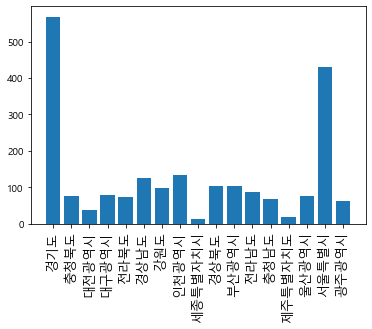

In [26]:
v3 = [len(df_idi[df_idi['시도명']==a[i]]) for i in range(len(a))]
index = np.arange(len(a))
plt.bar(a,v3)
plt.xticks(index,a,fontsize=13, rotation=90)

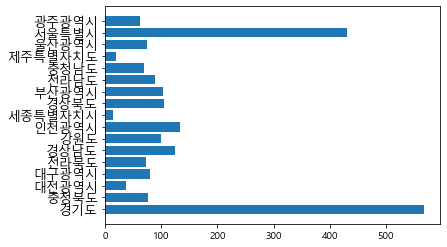

In [27]:
plt.barh(index, v3)
plt.yticks(index, a, fontsize=13, rotation=0)
plt.show()

In [28]:
sum_star = sum(v3);
for i in range(len(a)):
    print('이디야의 전구 대비 {}에서의 비율 : {: .3f}%' .format(a[i],v3[i]/sum_star*100))

이디야의 전구 대비 경기도에서의 비율 :  26.345%
이디야의 전구 대비 충청북도에서의 비율 :  3.525%
이디야의 전구 대비 대전광역시에서의 비율 :  1.716%
이디야의 전구 대비 대구광역시에서의 비율 :  3.711%
이디야의 전구 대비 전라북도에서의 비율 :  3.386%
이디야의 전구 대비 경상남도에서의 비율 :  5.798%
이디야의 전구 대비 강원도에서의 비율 :  4.592%
이디야의 전구 대비 인천광역시에서의 비율 :  6.169%
이디야의 전구 대비 세종특별자치시에서의 비율 :  0.649%
이디야의 전구 대비 경상북도에서의 비율 :  4.824%
이디야의 전구 대비 부산광역시에서의 비율 :  4.777%
이디야의 전구 대비 전라남도에서의 비율 :  4.082%
이디야의 전구 대비 충청남도에서의 비율 :  3.200%
이디야의 전구 대비 제주특별자치도에서의 비율 :  0.881%
이디야의 전구 대비 울산광역시에서의 비율 :  3.479%
이디야의 전구 대비 서울특별시에서의 비율 :  19.991%
이디야의 전구 대비 광주광역시에서의 비율 :  2.876%


([<matplotlib.axis.XTick at 0x1b160e5fb20>,
 [Text(0, 0, '스타벅스'), Text(1, 0, '투썸'), Text(2, 0, '이디야')])

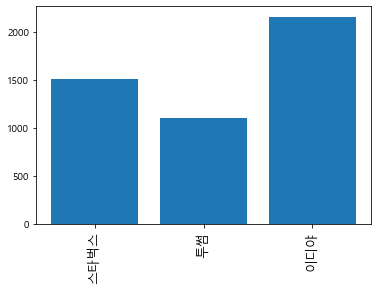

In [29]:
star = sum(v1)
two = sum(v2)
idi = sum(v3)
X=["스타벅스",'투썸','이디야']
Y=[star, two, idi]
index = [0,1,2]
plt.bar(X,Y)
plt.xticks(index, X, fontsize=13, rotation=90)

# 전반적으로 우리나라에서 중요한 커피브랜드의 수를 파악해 보았습니다.